# Code

## Loading packages

In [90]:
# Import packages
import osgeo
from os.path import join as pjoin
import pandas as pd
import numpy as np
import xarray as xr
import xrspatial as xrs
import rioxarray
import pyproj
import json
import datetime
from datetime import timedelta
from dateutil import parser

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

import pystac
from pystac_client import Client
import planetary_computer
import requests
import stackstac

import rich.table
import dask.diagnostics

scratch_dir = './scratch' 

In [91]:
import pystac
import planetary_computer
import rioxarray

## Load Planetary Computer Datasets per area

### Sjevjerodonetsk

In [92]:
from pystac_client import Client
import planetary_computer as pc

# Search against the Planetary Computer STAC API
catalog = Client.open(
  "https://planetarycomputer.microsoft.com/api/stac/v1"
)

# Define your area of interest
aoi = {
  "type": "Polygon",
  "coordinates": [
    [
      [38.00525171659987, 48.66867354355662],
      [39.14133707497999, 48.66867354355662],
      [39.14133707497999, 49.10914381549901],
      [38.00525171659987, 49.10914381549901],
      [38.00525171659987, 48.66867354355662]
    ]
  ]
}

# Define your temporal range
daterange = {"interval": ["2021-12-31T00:00:00Z", "2023-04-11T23:59:59Z"]}

# Define your search with CQL2 syntax
search = catalog.search(filter_lang="cql2-json", filter={
  "op": "and",
  "args": [
    {"op": "s_intersects", "args": [{"property": "geometry"}, aoi]},
    {"op": "anyinteracts", "args": [{"property": "datetime"}, daterange]},
    {"op": "=", "args": [{"property": "collection"}, "landsat-c2-l2"]},
    {"op": "<=", "args": [{"property": "eo:cloud_cover"}, 20]}
  ]
})

# Grab the first item from the search results and sign the assets
first_item = next(search.get_items())
pc.sign_item(first_item).assets

items = search.get_all_items()

ds_sjevjerodonetsk = stackstac.stack(planetary_computer.sign(items), epsg=32637)
ds_sjevjerodonetsk

<xarray.DataArray 'stackstac-134055fa989800d1ef5f8903655b776d' (time: 30,
                                                                band: 22,
                                                                y: 8042,
                                                                x: 15532)>
dask.array<fetch_raster_window, shape=(30, 22, 8042, 15532), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2022-01-08T08:18:56.70...
    id                           (time) <U31 'LC09_L2SP_176026_20220108_02_T1...
  * band                         (band) <U13 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 2.148e+05 2.148e+05 ... 6.807e+05
  * y                            (y) float64 5.533e+06 5.533e+06 ... 5.292e+06
    view:off_nadir               int32 0
    ...                           ...
    title                        (band) object 'Surface Temperature Quality A...
    classification:bitfields     (band) object None None ... None
    common_name                  (band) object None None None ... None None
    center_wavelength            (band) object None None None ... None None
    full_width_half_max          (band) object None None None ... 2.05 None None
    epsg                         int32 32637
Attributes:
    spec:        RasterSpec(epsg=32637, bounds=(214770.0, 5291970.0, 680730.0...
    crs:         epsg:32637
    transform:   | 30.00, 0.00, 214770.00|\n| 0.00,-30.00, 5533230.00|\n| 0.0...
    resolution:  30.0

### Mariinka

In [93]:
from pystac_client import Client
import planetary_computer as pc

# Search against the Planetary Computer STAC API
catalog = Client.open(
  "https://planetarycomputer.microsoft.com/api/stac/v1"
)

# Define your area of interest
aoi = {
  "type": "Polygon",
  "coordinates": [
    [
      [37.24228478247417, 47.79765919029202],
      [37.87733992041484, 47.79765919029202],
      [37.87733992041484, 48.04859763635565],
      [37.24228478247417, 48.04859763635565],
      [37.24228478247417, 47.79765919029202]
    ]
  ]
}

# Define your temporal range
daterange = {"interval": ["2021-12-31T00:00:00Z", "2023-04-11T23:59:59Z"]}

# Define your search with CQL2 syntax
search = catalog.search(filter_lang="cql2-json", filter={
  "op": "and",
  "args": [
    {"op": "s_intersects", "args": [{"property": "geometry"}, aoi]},
    {"op": "anyinteracts", "args": [{"property": "datetime"}, daterange]},
    {"op": "=", "args": [{"property": "collection"}, "landsat-c2-l2"]},
    {"op": "<=", "args": [{"property": "eo:cloud_cover"}, 20]}
  ]
})

# Grab the first item from the search results and sign the assets
first_item = next(search.get_items())
pc.sign_item(first_item).assets

items = search.get_all_items()

ds_mariinka = stackstac.stack(planetary_computer.sign(items), epsg=32637)
ds_mariinka

<xarray.DataArray 'stackstac-13ce2e2c5d6a8a0761401ebb40651a66' (time: 61,
                                                                band: 22,
                                                                y: 13439,
                                                                x: 16002)>
dask.array<fetch_raster_window, shape=(61, 22, 13439, 16002), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2022-01-08T08:18:56.70...
    id                           (time) <U31 'LC09_L2SP_176026_20220108_02_T1...
  * band                         (band) <U13 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 1.278e+05 1.278e+05 ... 6.078e+05
  * y                            (y) float64 5.537e+06 5.537e+06 ... 5.134e+06
    view:off_nadir               int32 0
    ...                           ...
    title                        (band) object 'Surface Temperature Quality A...
    classification:bitfields     (band) object None None ... None
    common_name                  (band) object None None None ... None None
    center_wavelength            (band) object None None None ... None None
    full_width_half_max          (band) object None None None ... 2.05 None None
    epsg                         int32 32637
Attributes:
    spec:        RasterSpec(epsg=32637, bounds=(127770.0, 5134260.0, 607830.0...
    crs:         epsg:32637
    transform:   | 30.00, 0.00, 127770.00|\n| 0.00,-30.00, 5537430.00|\n| 0.0...
    resolution:  30.0

### Pisky

In [94]:
from pystac_client import Client
import planetary_computer as pc

# Search against the Planetary Computer STAC API
catalog = Client.open(
  "https://planetarycomputer.microsoft.com/api/stac/v1"
)

# Define your area of interest
aoi = {
  "type": "Polygon",
  "coordinates": [
    [
      [37.50517543855719, 47.97609536386986],
      [37.908323116658096, 47.97609536386986],
      [37.908323116658096, 48.13498894963189],
      [37.50517543855719, 48.13498894963189],
      [37.50517543855719, 47.97609536386986]
    ]
  ]
}

# Define your temporal range
daterange = {"interval": ["2021-12-31T00:00:00Z", "2023-04-11T23:59:59Z"]}

# Define your search with CQL2 syntax
search = catalog.search(filter_lang="cql2-json", filter={
  "op": "and",
  "args": [
    {"op": "s_intersects", "args": [{"property": "geometry"}, aoi]},
    {"op": "anyinteracts", "args": [{"property": "datetime"}, daterange]},
    {"op": "=", "args": [{"property": "collection"}, "landsat-c2-l2"]},
    {"op": "<=", "args": [{"property": "eo:cloud_cover"}, 20]}
  ]
})

# Grab the first item from the search results and sign the assets
first_item = next(search.get_items())
pc.sign_item(first_item).assets

items = search.get_all_items()

ds_pisky = stackstac.stack(planetary_computer.sign(items), epsg=32637)
ds_pisky

<xarray.DataArray 'stackstac-ac24c65c41ebc4a5cc4a1b94cf78ee70' (time: 45,
                                                                band: 22,
                                                                y: 13272,
                                                                x: 14632)>
dask.array<fetch_raster_window, shape=(45, 22, 13272, 14632), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2022-01-08T08:18:56.70...
    id                           (time) <U31 'LC09_L2SP_176026_20220108_02_T1...
  * band                         (band) <U13 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 1.689e+05 1.689e+05 ... 6.078e+05
  * y                            (y) float64 5.533e+06 5.533e+06 ... 5.135e+06
    view:off_nadir               int32 0
    ...                           ...
    title                        (band) object 'Surface Temperature Quality A...
    classification:bitfields     (band) object None None ... None
    common_name                  (band) object None None None ... None None
    center_wavelength            (band) object None None None ... None None
    full_width_half_max          (band) object None None None ... 2.05 None None
    epsg                         int32 32637
Attributes:
    spec:        RasterSpec(epsg=32637, bounds=(168870.0, 5135070.0, 607830.0...
    crs:         epsg:32637
    transform:   | 30.00, 0.00, 168870.00|\n| 0.00,-30.00, 5533230.00|\n| 0.0...
    resolution:  30.0

### Bakhmut

In [95]:
from pystac_client import Client
import planetary_computer as pc

# Search against the Planetary Computer STAC API
catalog = Client.open(
  "https://planetarycomputer.microsoft.com/api/stac/v1"
)

# Define your area of interest
aoi = {
  "type": "Polygon",
  "coordinates": [
    [
      [37.72410271791307, 48.45269705771],
      [38.37045617402194, 48.45269705771],
      [38.37045617402194, 48.7048461471677],
      [37.72410271791307, 48.7048461471677],
      [37.72410271791307, 48.45269705771]
    ]
  ]
}

# Define your temporal range
daterange = {"interval": ["2021-12-31T00:00:00Z", "2023-04-11T23:59:59Z"]}

# Define your search with CQL2 syntax
search = catalog.search(filter_lang="cql2-json", filter={
  "op": "and",
  "args": [
    {"op": "s_intersects", "args": [{"property": "geometry"}, aoi]},
    {"op": "anyinteracts", "args": [{"property": "datetime"}, daterange]},
    {"op": "=", "args": [{"property": "collection"}, "landsat-c2-l2"]},
    {"op": "<=", "args": [{"property": "eo:cloud_cover"}, 20]}
  ]
})

# Grab the first item from the search results and sign the assets
first_item = next(search.get_items())
pc.sign_item(first_item).assets

items = search.get_all_items()

ds_bakhmut = stackstac.stack(planetary_computer.sign(items), epsg=32637)
ds_bakhmut

<xarray.DataArray 'stackstac-62c44ef649b47d3e94e11fdcb1aa0934' (time: 43,
                                                                band: 22,
                                                                y: 13272,
                                                                x: 15532)>
dask.array<fetch_raster_window, shape=(43, 22, 13272, 15532), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2022-01-08T08:18:56.70...
    id                           (time) <U31 'LC09_L2SP_176026_20220108_02_T1...
  * band                         (band) <U13 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 2.148e+05 2.148e+05 ... 6.807e+05
  * y                            (y) float64 5.533e+06 5.533e+06 ... 5.135e+06
    view:off_nadir               int32 0
    ...                           ...
    title                        (band) object 'Surface Temperature Quality A...
    classification:bitfields     (band) object None None ... None
    common_name                  (band) object None None None ... None None
    center_wavelength            (band) object None None None ... None None
    full_width_half_max          (band) object None None None ... 2.05 None None
    epsg                         int32 32637
Attributes:
    spec:        RasterSpec(epsg=32637, bounds=(214770.0, 5135070.0, 680730.0...
    crs:         epsg:32637
    transform:   | 30.00, 0.00, 214770.00|\n| 0.00,-30.00, 5533230.00|\n| 0.0...
    resolution:  30.0

### Hostomel

In [96]:
from pystac_client import Client
import planetary_computer as pc

# Search against the Planetary Computer STAC API
catalog = Client.open(
  "https://planetarycomputer.microsoft.com/api/stac/v1"
)

# Define your area of interest
aoi = {
  "type": "Polygon",
  "coordinates": [
    [
      [29.915994182960446, 50.39977895855145],
      [30.687203570577992, 50.39977895855145],
      [30.687203570577992, 50.688762717130004],
      [29.915994182960446, 50.688762717130004],
      [29.915994182960446, 50.39977895855145]
    ]
  ]
}

# Define your temporal range
daterange = {"interval": ["2021-12-31T00:00:00Z", "2023-04-11T23:59:59Z"]}

# Define your search with CQL2 syntax
search = catalog.search(filter_lang="cql2-json", filter={
  "op": "and",
  "args": [
    {"op": "s_intersects", "args": [{"property": "geometry"}, aoi]},
    {"op": "anyinteracts", "args": [{"property": "datetime"}, daterange]},
    {"op": "=", "args": [{"property": "collection"}, "landsat-c2-l2"]},
    {"op": "<=", "args": [{"property": "eo:cloud_cover"}, 20]}
  ]
})

# Grab the first item from the search results and sign the assets
first_item = next(search.get_items())
pc.sign_item(first_item).assets

items = search.get_all_items()

ds_hostomel = stackstac.stack(planetary_computer.sign(items), epsg=32636)
ds_hostomel

<xarray.DataArray 'stackstac-4a1745760b8a9fed2a99aeb9479fe016' (time: 44,
                                                                band: 22,
                                                                y: 13633,
                                                                x: 15933)>
dask.array<fetch_raster_window, shape=(44, 22, 13633, 15933), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2022-01-02T08:55:39.14...
    id                           (time) <U31 'LC09_L2SP_182025_20220102_02_T1...
  * band                         (band) <U13 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 7.614e+04 7.617e+04 ... 5.541e+05
  * y                            (y) float64 5.858e+06 5.858e+06 ... 5.449e+06
    view:off_nadir               int32 0
    ...                           ...
    title                        (band) object 'Surface Temperature Quality A...
    classification:bitfields     (band) object None None ... None
    common_name                  (band) object None None None ... None None
    center_wavelength            (band) object None None None ... None None
    full_width_half_max          (band) object None None None ... 2.05 None None
    epsg                         int32 32636
Attributes:
    spec:        RasterSpec(epsg=32636, bounds=(76140.0, 5449350.0, 554130.0,...
    crs:         epsg:32636
    transform:   | 30.00, 0.00, 76140.00|\n| 0.00,-30.00, 5858340.00|\n| 0.00...
    resolution:  30.0

### Kherson

In [97]:
from pystac_client import Client
import planetary_computer as pc

# Search against the Planetary Computer STAC API
catalog = Client.open(
  "https://planetarycomputer.microsoft.com/api/stac/v1"
)

# Define your area of interest
aoi = {
  "type": "Polygon",
  "coordinates": [
    [
      [31.695222985384277, 46.339121817058356],
      [34.44024238412638, 46.339121817058356],
      [34.44024238412638, 47.4451886840601],
      [31.695222985384277, 47.4451886840601],
      [31.695222985384277, 46.339121817058356]
    ]
  ]
}

# Define your temporal range
daterange = {"interval": ["2021-12-31T00:00:00Z", "2023-04-11T23:59:59Z"]}

# Define your search with CQL2 syntax
search = catalog.search(filter_lang="cql2-json", filter={
  "op": "and",
  "args": [
    {"op": "s_intersects", "args": [{"property": "geometry"}, aoi]},
    {"op": "anyinteracts", "args": [{"property": "datetime"}, daterange]},
    {"op": "=", "args": [{"property": "collection"}, "landsat-c2-l2"]},
    {"op": "<=", "args": [{"property": "eo:cloud_cover"}, 20]}
  ]
})

# Grab the first item from the search results and sign the assets
first_item = next(search.get_items())
pc.sign_item(first_item).assets

items = search.get_all_items()

ds_kherson = stackstac.stack(planetary_computer.sign(items), epsg=32636)
ds_kherson

<xarray.DataArray 'stackstac-4972fd0637284bb99234c030826f8ad4' (time: 123,
                                                                band: 22,
                                                                y: 13322,
                                                                x: 22082)>
dask.array<fetch_raster_window, shape=(123, 22, 13322, 22082), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2022-01-04T08:44:04.87...
    id                           (time) <U31 'LC09_L2SP_180027_20220104_02_T1...
  * band                         (band) <U13 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 1.674e+05 1.674e+05 ... 8.298e+05
  * y                            (y) float64 5.377e+06 5.377e+06 ... 4.978e+06
    view:off_nadir               int32 0
    ...                           ...
    title                        (band) object 'Surface Temperature Quality A...
    classification:bitfields     (band) object None None ... None
    common_name                  (band) object None None None ... None None
    center_wavelength            (band) object None None None ... None None
    full_width_half_max          (band) object None None None ... 2.05 None None
    epsg                         int32 32636
Attributes:
    spec:        RasterSpec(epsg=32636, bounds=(167370.0, 4977570.0, 829830.0...
    crs:         epsg:32636
    transform:   | 30.00, 0.00, 167370.00|\n| 0.00,-30.00, 5377230.00|\n| 0.0...
    resolution:  30.0

### Avdiivka

In [98]:
from pystac_client import Client
import planetary_computer as pc

# Search against the Planetary Computer STAC API
catalog = Client.open(
  "https://planetarycomputer.microsoft.com/api/stac/v1"
)

# Define your area of interest
aoi = {
  "type": "Polygon",
  "coordinates": [
    [
      [37.56839496220638, 48.0377262692094],
      [37.99601347886863, 48.0377262692094],
      [37.99601347886863, 48.20604730454326],
      [37.56839496220638, 48.20604730454326],
      [37.56839496220638, 48.0377262692094]
    ]
  ]
}

# Define your temporal range
daterange = {"interval": ["2021-12-31T00:00:00Z", "2023-04-11T23:59:59Z"]}

# Define your search with CQL2 syntax
search = catalog.search(filter_lang="cql2-json", filter={
  "op": "and",
  "args": [
    {"op": "s_intersects", "args": [{"property": "geometry"}, aoi]},
    {"op": "anyinteracts", "args": [{"property": "datetime"}, daterange]},
    {"op": "=", "args": [{"property": "collection"}, "landsat-c2-l2"]},
    {"op": "<=", "args": [{"property": "eo:cloud_cover"}, 20]}
  ]
})

# Grab the first item from the search results and sign the assets
first_item = next(search.get_items())
pc.sign_item(first_item).assets

items = search.get_all_items()

ds_avdiivka = stackstac.stack(planetary_computer.sign(items), epsg=32637)
ds_avdiivka

<xarray.DataArray 'stackstac-6d7b66364931f8c916b74fb5afb97e92' (time: 57,
                                                                band: 22,
                                                                y: 13272,
                                                                x: 16012)>
dask.array<fetch_raster_window, shape=(57, 22, 13272, 16012), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2022-01-08T08:18:56.70...
    id                           (time) <U31 'LC09_L2SP_176026_20220108_02_T1...
  * band                         (band) <U13 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 1.689e+05 1.689e+05 ... 6.492e+05
  * y                            (y) float64 5.533e+06 5.533e+06 ... 5.135e+06
    view:off_nadir               int32 0
    ...                           ...
    title                        (band) object 'Surface Temperature Quality A...
    classification:bitfields     (band) object None None ... None
    common_name                  (band) object None None None ... None None
    center_wavelength            (band) object None None None ... None None
    full_width_half_max          (band) object None None None ... 2.05 None None
    epsg                         int32 32637
Attributes:
    spec:        RasterSpec(epsg=32637, bounds=(168870.0, 5135070.0, 649230.0...
    crs:         epsg:32637
    transform:   | 30.00, 0.00, 168870.00|\n| 0.00,-30.00, 5533230.00|\n| 0.0...
    resolution:  30.0

### Izium

In [99]:
from pystac_client import Client
import planetary_computer as pc

# Search against the Planetary Computer STAC API
catalog = Client.open(
  "https://planetarycomputer.microsoft.com/api/stac/v1"
)

# Define your area of interest
aoi = {
  "type": "Polygon",
  "coordinates": [
    [
      [36.74126166096022, 48.93564921475138],
      [37.92447057176577, 48.93564921475138],
      [37.92447057176577, 49.39186249685588],
      [36.74126166096022, 49.39186249685588],
      [36.74126166096022, 48.93564921475138]
    ]
  ]
}

# Define your temporal range
daterange = {"interval": ["2021-12-31T00:00:00Z", "2023-04-11T23:59:59Z"]}

# Define your search with CQL2 syntax
search = catalog.search(filter_lang="cql2-json", filter={
  "op": "and",
  "args": [
    {"op": "s_intersects", "args": [{"property": "geometry"}, aoi]},
    {"op": "anyinteracts", "args": [{"property": "datetime"}, daterange]},
    {"op": "=", "args": [{"property": "collection"}, "landsat-c2-l2"]},
    {"op": "<=", "args": [{"property": "eo:cloud_cover"}, 20]}
  ]
})

# Grab the first item from the search results and sign the assets
first_item = next(search.get_items())
pc.sign_item(first_item).assets

items = search.get_all_items()

ds_izium = stackstac.stack(planetary_computer.sign(items), epsg=32637)
ds_izium

<xarray.DataArray 'stackstac-1ad0b511ae1887d257200e41c80f9d0e' (time: 43,
                                                                band: 22,
                                                                y: 13382,
                                                                x: 17872)>
dask.array<fetch_raster_window, shape=(43, 22, 13382, 17872), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2022-01-08T08:18:56.70...
    id                           (time) <U31 'LC09_L2SP_176026_20220108_02_T1...
  * band                         (band) <U13 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 9.927e+04 9.93e+04 ... 6.354e+05
  * y                            (y) float64 5.693e+06 5.693e+06 ... 5.292e+06
    view:off_nadir               int32 0
    ...                           ...
    title                        (band) object 'Surface Temperature Quality A...
    classification:bitfields     (band) object None None ... None
    common_name                  (band) object None None None ... None None
    center_wavelength            (band) object None None None ... None None
    full_width_half_max          (band) object None None None ... 2.05 None None
    epsg                         int32 32637
Attributes:
    spec:        RasterSpec(epsg=32637, bounds=(99270.0, 5291970.0, 635430.0,...
    crs:         epsg:32637
    transform:   | 30.00, 0.00, 99270.00|\n| 0.00,-30.00, 5693430.00|\n| 0.00...
    resolution:  30.0

### Velyka Novosilka

In [100]:
from pystac_client import Client
import planetary_computer as pc

# Search against the Planetary Computer STAC API
catalog = Client.open(
  "https://planetarycomputer.microsoft.com/api/stac/v1"
)

# Define your area of interest
aoi = {
  "type": "Polygon",
  "coordinates": [
    [
      [36.437506262525034, 47.60260904082929],
      [37.44401207636321, 47.60260904082929],
      [37.44401207636321, 48.001253392212874],
      [36.437506262525034, 48.001253392212874],
      [36.437506262525034, 47.60260904082929]
    ]
  ]
}

# Define your temporal range
daterange = {"interval": ["2021-12-31T00:00:00Z", "2023-04-11T23:59:59Z"]}

# Define your search with CQL2 syntax
search = catalog.search(filter_lang="cql2-json", filter={
  "op": "and",
  "args": [
    {"op": "s_intersects", "args": [{"property": "geometry"}, aoi]},
    {"op": "anyinteracts", "args": [{"property": "datetime"}, daterange]},
    {"op": "=", "args": [{"property": "collection"}, "landsat-c2-l2"]},
    {"op": "<=", "args": [{"property": "eo:cloud_cover"}, 20]}
  ]
})

# Grab the first item from the search results and sign the assets
first_item = next(search.get_items())
pc.sign_item(first_item).assets

items = search.get_all_items()

ds_velykanovosilka = stackstac.stack(planetary_computer.sign(items), epsg=32637)
ds_velykanovosilka

<xarray.DataArray 'stackstac-3b5bf27fa7760c487c67f06dc36f9504' (time: 41,
                                                                band: 22,
                                                                y: 13439,
                                                                x: 17787)>
dask.array<fetch_raster_window, shape=(41, 22, 13439, 17787), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2022-01-08T08:19:20.58...
    id                           (time) <U31 'LC09_L2SP_176027_20220108_02_T1...
  * band                         (band) <U13 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 6.072e+04 6.075e+04 ... 5.943e+05
  * y                            (y) float64 5.537e+06 5.537e+06 ... 5.134e+06
    view:off_nadir               int32 0
    ...                           ...
    title                        (band) object 'Surface Temperature Quality A...
    classification:bitfields     (band) object None None ... None
    common_name                  (band) object None None None ... None None
    center_wavelength            (band) object None None None ... None None
    full_width_half_max          (band) object None None None ... 2.05 None None
    epsg                         int32 32637
Attributes:
    spec:        RasterSpec(epsg=32637, bounds=(60720.0, 5134260.0, 594330.0,...
    crs:         epsg:32637
    transform:   | 30.00, 0.00, 60720.00|\n| 0.00,-30.00, 5537430.00|\n| 0.00...
    resolution:  30.0

### Lyman

In [101]:
from pystac_client import Client
import planetary_computer as pc

# Search against the Planetary Computer STAC API
catalog = Client.open(
  "https://planetarycomputer.microsoft.com/api/stac/v1"
)

# Define your area of interest
aoi = {
  "type": "Polygon",
  "coordinates": [
    [
      [37.514597985330084, 48.84446281159609],
      [38.16765284672593, 48.84446281159609],
      [38.16765284672593, 49.097244223664916],
      [37.514597985330084, 49.097244223664916],
      [37.514597985330084, 48.84446281159609]
    ]
  ]
}

# Define your temporal range
daterange = {"interval": ["2021-12-31T00:00:00Z", "2023-04-11T23:59:59Z"]}

# Define your search with CQL2 syntax
search = catalog.search(filter_lang="cql2-json", filter={
  "op": "and",
  "args": [
    {"op": "s_intersects", "args": [{"property": "geometry"}, aoi]},
    {"op": "anyinteracts", "args": [{"property": "datetime"}, daterange]},
    {"op": "=", "args": [{"property": "collection"}, "landsat-c2-l2"]},
    {"op": "<=", "args": [{"property": "eo:cloud_cover"}, 20]}
  ]
})

# Grab the first item from the search results and sign the assets
first_item = next(search.get_items())
pc.sign_item(first_item).assets

items = search.get_all_items()

ds_lyman = stackstac.stack(planetary_computer.sign(items), epsg=32637)
ds_lyman

<xarray.DataArray 'stackstac-9d6613548ece50270ec1d1281cc929dc' (time: 37,
                                                                band: 22,
                                                                y: 8182,
                                                                x: 15662)>
dask.array<fetch_raster_window, shape=(37, 22, 8182, 15662), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2022-01-08T08:18:56.70...
    id                           (time) <U31 'LC09_L2SP_176026_20220108_02_T1...
  * band                         (band) <U13 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 1.794e+05 1.794e+05 ... 6.492e+05
  * y                            (y) float64 5.537e+06 5.537e+06 ... 5.292e+06
    view:off_nadir               int32 0
    ...                           ...
    title                        (band) object 'Surface Temperature Quality A...
    classification:bitfields     (band) object None None ... None
    common_name                  (band) object None None None ... None None
    center_wavelength            (band) object None None None ... None None
    full_width_half_max          (band) object None None None ... 2.05 None None
    epsg                         int32 32637
Attributes:
    spec:        RasterSpec(epsg=32637, bounds=(179370.0, 5291970.0, 649230.0...
    crs:         epsg:32637
    transform:   | 30.00, 0.00, 179370.00|\n| 0.00,-30.00, 5537430.00|\n| 0.0...
    resolution:  30.0

### Kharkiv

In [102]:
from pystac_client import Client
import planetary_computer as pc

# Search against the Planetary Computer STAC API
catalog = Client.open(
  "https://planetarycomputer.microsoft.com/api/stac/v1"
)

# Define your area of interest
aoi = {
  "type": "Polygon",
  "coordinates": [
    [
      [35.48847684629678, 49.55037713347531],
      [37.43359630078871, 49.55037713347531],
      [37.43359630078871, 50.28883764356226],
      [35.48847684629678, 50.28883764356226],
      [35.48847684629678, 49.55037713347531]
    ]
  ]
}

# Define your temporal range
daterange = {"interval": ["2021-12-31T00:00:00Z", "2023-04-11T23:59:59Z"]}

# Define your search with CQL2 syntax
search = catalog.search(filter_lang="cql2-json", filter={
  "op": "and",
  "args": [
    {"op": "s_intersects", "args": [{"property": "geometry"}, aoi]},
    {"op": "anyinteracts", "args": [{"property": "datetime"}, daterange]},
    {"op": "=", "args": [{"property": "collection"}, "landsat-c2-l2"]},
    {"op": "<=", "args": [{"property": "eo:cloud_cover"}, 20]}
  ]
})

# Grab the first item from the search results and sign the assets
first_item = next(search.get_items())
pc.sign_item(first_item).assets

items = search.get_all_items()

ds_kharkiv = stackstac.stack(planetary_computer.sign(items), epsg=32637)
ds_kharkiv

<xarray.DataArray 'stackstac-90ecb956320cc99cdc394da7d259d25c' (time: 86,
                                                                band: 22,
                                                                y: 13748,
                                                                x: 18127)>
dask.array<fetch_raster_window, shape=(86, 22, 13748, 18127), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2022-01-08T08:18:32.82...
    id                           (time) <U31 'LC09_L2SP_176025_20220108_02_T2...
  * band                         (band) <U13 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 3.792e+04 3.795e+04 ... 5.817e+05
  * y                            (y) float64 5.704e+06 5.704e+06 ... 5.292e+06
    view:off_nadir               int32 0
    ...                           ...
    title                        (band) object 'Surface Temperature Quality A...
    classification:bitfields     (band) object None None ... None
    common_name                  (band) object None None None ... None None
    center_wavelength            (band) object None None None ... None None
    full_width_half_max          (band) object None None None ... 2.05 None None
    epsg                         int32 32637
Attributes:
    spec:        RasterSpec(epsg=32637, bounds=(37920.0, 5291970.0, 581730.0,...
    crs:         epsg:32637
    transform:   | 30.00, 0.00, 37920.00|\n| 0.00,-30.00, 5704410.00|\n| 0.00...
    resolution:  30.0

### Vrubivka

In [103]:
from pystac_client import Client
import planetary_computer as pc

# Search against the Planetary Computer STAC API
catalog = Client.open(
  "https://planetarycomputer.microsoft.com/api/stac/v1"
)

# Define your area of interest
aoi = {
  "type": "Polygon",
  "coordinates": [
    [
      [37.92692153201705, 48.58814762329976],
      [38.692947167514546, 48.58814762329976],
      [38.692947167514546, 48.88604461748798],
      [37.92692153201705, 48.88604461748798],
      [37.92692153201705, 48.58814762329976]
    ]
  ]
}

# Define your temporal range
daterange = {"interval": ["2021-12-31T00:00:00Z", "2023-04-11T23:59:59Z"]}

# Define your search with CQL2 syntax
search = catalog.search(filter_lang="cql2-json", filter={
  "op": "and",
  "args": [
    {"op": "s_intersects", "args": [{"property": "geometry"}, aoi]},
    {"op": "anyinteracts", "args": [{"property": "datetime"}, daterange]},
    {"op": "=", "args": [{"property": "collection"}, "landsat-c2-l2"]},
    {"op": "<=", "args": [{"property": "eo:cloud_cover"}, 20]}
  ]
})

# Grab the first item from the search results and sign the assets
first_item = next(search.get_items())
pc.sign_item(first_item).assets

items = search.get_all_items()

ds_vrubivka = stackstac.stack(planetary_computer.sign(items), epsg=32637)
ds_vrubivka

<xarray.DataArray 'stackstac-952b83c80b2d2a0821d67c1969e46aee' (time: 30,
                                                                band: 22,
                                                                y: 8042,
                                                                x: 15532)>
dask.array<fetch_raster_window, shape=(30, 22, 8042, 15532), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2022-01-08T08:18:56.70...
    id                           (time) <U31 'LC09_L2SP_176026_20220108_02_T1...
  * band                         (band) <U13 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 2.148e+05 2.148e+05 ... 6.807e+05
  * y                            (y) float64 5.533e+06 5.533e+06 ... 5.292e+06
    view:off_nadir               int32 0
    ...                           ...
    title                        (band) object 'Surface Temperature Quality A...
    classification:bitfields     (band) object None None ... None
    common_name                  (band) object None None None ... None None
    center_wavelength            (band) object None None None ... None None
    full_width_half_max          (band) object None None None ... 2.05 None None
    epsg                         int32 32637
Attributes:
    spec:        RasterSpec(epsg=32637, bounds=(214770.0, 5291970.0, 680730.0...
    crs:         epsg:32637
    transform:   | 30.00, 0.00, 214770.00|\n| 0.00,-30.00, 5533230.00|\n| 0.0...
    resolution:  30.0

### New York

In [104]:
from pystac_client import Client
import planetary_computer as pc

# Search against the Planetary Computer STAC API
catalog = Client.open(
  "https://planetarycomputer.microsoft.com/api/stac/v1"
)

# Define your area of interest
aoi = {
  "type": "Polygon",
  "coordinates": [
    [
      [37.65361372381136, 48.2216043490009],
      [38.179063544226125, 48.2216043490009],
      [38.179063544226125, 48.42761650015228],
      [37.65361372381136, 48.42761650015228],
      [37.65361372381136, 48.2216043490009]
    ]
  ]
}

# Define your temporal range
daterange = {"interval": ["2021-12-31T00:00:00Z", "2023-04-11T23:59:59Z"]}

# Define your search with CQL2 syntax
search = catalog.search(filter_lang="cql2-json", filter={
  "op": "and",
  "args": [
    {"op": "s_intersects", "args": [{"property": "geometry"}, aoi]},
    {"op": "anyinteracts", "args": [{"property": "datetime"}, daterange]},
    {"op": "=", "args": [{"property": "collection"}, "landsat-c2-l2"]},
    {"op": "<=", "args": [{"property": "eo:cloud_cover"}, 20]}
  ]
})

# Grab the first item from the search results and sign the assets
first_item = next(search.get_items())
pc.sign_item(first_item).assets

items = search.get_all_items()

ds_newyork = stackstac.stack(planetary_computer.sign(items), epsg=32637)
ds_newyork

<xarray.DataArray 'stackstac-91a794ba0f03743c28e7d4e2238dccbc' (time: 57,
                                                                band: 22,
                                                                y: 13272,
                                                                x: 15192)>
dask.array<fetch_raster_window, shape=(57, 22, 13272, 15192), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2022-01-08T08:18:56.70...
    id                           (time) <U31 'LC09_L2SP_176026_20220108_02_T1...
  * band                         (band) <U13 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 2.148e+05 2.148e+05 ... 6.705e+05
  * y                            (y) float64 5.533e+06 5.533e+06 ... 5.135e+06
    view:off_nadir               int32 0
    ...                           ...
    title                        (band) object 'Surface Temperature Quality A...
    classification:bitfields     (band) object None None ... None
    common_name                  (band) object None None None ... None None
    center_wavelength            (band) object None None None ... None None
    full_width_half_max          (band) object None None None ... 2.05 None None
    epsg                         int32 32637
Attributes:
    spec:        RasterSpec(epsg=32637, bounds=(214770.0, 5135070.0, 670530.0...
    crs:         epsg:32637
    transform:   | 30.00, 0.00, 214770.00|\n| 0.00,-30.00, 5533230.00|\n| 0.0...
    resolution:  30.0

### Vuhledar

In [105]:
from pystac_client import Client
import planetary_computer as pc

# Search against the Planetary Computer STAC API
catalog = Client.open(
  "https://planetarycomputer.microsoft.com/api/stac/v1"
)

# Define your area of interest
aoi = {
  "type": "Polygon",
  "coordinates": [
    [
      [36.685788848258, 47.492162171644935],
      [37.95694854486638, 47.492162171644935],
      [37.95694854486638, 47.99618478415164],
      [36.685788848258, 47.99618478415164],
      [36.685788848258, 47.492162171644935]
    ]
  ]
}

# Define your temporal range
daterange = {"interval": ["2021-12-31T00:00:00Z", "2023-04-11T23:59:59Z"]}

# Define your search with CQL2 syntax
search = catalog.search(filter_lang="cql2-json", filter={
  "op": "and",
  "args": [
    {"op": "s_intersects", "args": [{"property": "geometry"}, aoi]},
    {"op": "anyinteracts", "args": [{"property": "datetime"}, daterange]},
    {"op": "=", "args": [{"property": "collection"}, "landsat-c2-l2"]},
    {"op": "<=", "args": [{"property": "eo:cloud_cover"}, 20]}
  ]
})

# Grab the first item from the search results and sign the assets
first_item = next(search.get_items())
pc.sign_item(first_item).assets

items = search.get_all_items()

ds_vuhledar = stackstac.stack(planetary_computer.sign(items), epsg=32637)
ds_vuhledar

<xarray.DataArray 'stackstac-7b1607f3fca3ec3ad956c4f75aa8bbfe' (time: 64,
                                                                band: 22,
                                                                y: 13439,
                                                                x: 18607)>
dask.array<fetch_raster_window, shape=(64, 22, 13439, 18607), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2022-01-08T08:18:56.70...
    id                           (time) <U31 'LC09_L2SP_176026_20220108_02_T1...
  * band                         (band) <U13 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 8.292e+04 8.295e+04 ... 6.411e+05
  * y                            (y) float64 5.537e+06 5.537e+06 ... 5.134e+06
    view:off_nadir               int32 0
    ...                           ...
    title                        (band) object 'Surface Temperature Quality A...
    classification:bitfields     (band) object None None ... None
    common_name                  (band) object None None None ... None None
    center_wavelength            (band) object None None None ... None None
    full_width_half_max          (band) object None None None ... 2.05 None None
    epsg                         int32 32637
Attributes:
    spec:        RasterSpec(epsg=32637, bounds=(82920.0, 5134260.0, 641130.0,...
    crs:         epsg:32637
    transform:   | 30.00, 0.00, 82920.00|\n| 0.00,-30.00, 5537430.00|\n| 0.00...
    resolution:  30.0

### Soledar

In [106]:
from pystac_client import Client
import planetary_computer as pc

# Search against the Planetary Computer STAC API
catalog = Client.open(
  "https://planetarycomputer.microsoft.com/api/stac/v1"
)

# Define your area of interest
aoi = {
  "type": "Polygon",
  "coordinates": [
    [
      [37.73898814884981, 48.52336313238203],
      [38.48577383015257, 48.52336313238203],
      [38.48577383015257, 48.81417256189738],
      [37.73898814884981, 48.81417256189738],
      [37.73898814884981, 48.52336313238203]
    ]
  ]
}

# Define your temporal range
daterange = {"interval": ["2021-12-31T00:00:00Z", "2023-04-11T23:59:59Z"]}

# Define your search with CQL2 syntax
search = catalog.search(filter_lang="cql2-json", filter={
  "op": "and",
  "args": [
    {"op": "s_intersects", "args": [{"property": "geometry"}, aoi]},
    {"op": "anyinteracts", "args": [{"property": "datetime"}, daterange]},
    {"op": "=", "args": [{"property": "collection"}, "landsat-c2-l2"]},
    {"op": "<=", "args": [{"property": "eo:cloud_cover"}, 20]}
  ]
})

# Grab the first item from the search results and sign the assets
first_item = next(search.get_items())
pc.sign_item(first_item).assets

items = search.get_all_items()

ds_soledar = stackstac.stack(planetary_computer.sign(items), epsg=32637)
ds_soledar

<xarray.DataArray 'stackstac-760d399c88c8edfba56e802fc8c502b2' (time: 30,
                                                                band: 22,
                                                                y: 8042,
                                                                x: 15532)>
dask.array<fetch_raster_window, shape=(30, 22, 8042, 15532), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2022-01-08T08:18:56.70...
    id                           (time) <U31 'LC09_L2SP_176026_20220108_02_T1...
  * band                         (band) <U13 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 2.148e+05 2.148e+05 ... 6.807e+05
  * y                            (y) float64 5.533e+06 5.533e+06 ... 5.292e+06
    view:off_nadir               int32 0
    ...                           ...
    title                        (band) object 'Surface Temperature Quality A...
    classification:bitfields     (band) object None None ... None
    common_name                  (band) object None None None ... None None
    center_wavelength            (band) object None None None ... None None
    full_width_half_max          (band) object None None None ... 2.05 None None
    epsg                         int32 32637
Attributes:
    spec:        RasterSpec(epsg=32637, bounds=(214770.0, 5291970.0, 680730.0...
    crs:         epsg:32637
    transform:   | 30.00, 0.00, 214770.00|\n| 0.00,-30.00, 5533230.00|\n| 0.0...
    resolution:  30.0

### Svatove

In [107]:
from pystac_client import Client
import planetary_computer as pc

# Search against the Planetary Computer STAC API
catalog = Client.open(
  "https://planetarycomputer.microsoft.com/api/stac/v1"
)

# Define your area of interest
aoi = {
  "type": "Polygon",
  "coordinates": [
    [
      [37.43958751008017, 49.04118130709779],
      [39.028200305233355, 49.04118130709779],
      [39.028200305233355, 49.65144136016633],
      [37.43958751008017, 49.65144136016633],
      [37.43958751008017, 49.04118130709779]
    ]
  ]
}

# Define your temporal range
daterange = {"interval": ["2021-12-31T00:00:00Z", "2023-04-11T23:59:59Z"]}

# Define your search with CQL2 syntax
search = catalog.search(filter_lang="cql2-json", filter={
  "op": "and",
  "args": [
    {"op": "s_intersects", "args": [{"property": "geometry"}, aoi]},
    {"op": "anyinteracts", "args": [{"property": "datetime"}, daterange]},
    {"op": "=", "args": [{"property": "collection"}, "landsat-c2-l2"]},
    {"op": "<=", "args": [{"property": "eo:cloud_cover"}, 20]}
  ]
})

# Grab the first item from the search results and sign the assets
first_item = next(search.get_items())
pc.sign_item(first_item).assets

items = search.get_all_items()

ds_svatove = stackstac.stack(planetary_computer.sign(items), epsg=32637)
ds_svatove

<xarray.DataArray 'stackstac-26b6afefef8a089d0c370e049aa93ea4' (time: 80,
                                                                band: 22,
                                                                y: 13382,
                                                                x: 17622)>
dask.array<fetch_raster_window, shape=(80, 22, 13382, 17622), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2022-01-08T08:18:32.82...
    id                           (time) <U31 'LC09_L2SP_176025_20220108_02_T2...
  * band                         (band) <U13 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 1.794e+05 1.794e+05 ... 7.08e+05
  * y                            (y) float64 5.693e+06 5.693e+06 ... 5.292e+06
    view:off_nadir               int32 0
    ...                           ...
    title                        (band) object 'Surface Temperature Quality A...
    classification:bitfields     (band) object None None ... None
    common_name                  (band) object None None None ... None None
    center_wavelength            (band) object None None None ... None None
    full_width_half_max          (band) object None None None ... 2.05 None None
    epsg                         int32 32637
Attributes:
    spec:        RasterSpec(epsg=32637, bounds=(179370.0, 5291970.0, 708030.0...
    crs:         epsg:32637
    transform:   | 30.00, 0.00, 179370.00|\n| 0.00,-30.00, 5693430.00|\n| 0.0...
    resolution:  30.0

### Kremnina

In [108]:
from pystac_client import Client
import planetary_computer as pc

# Search against the Planetary Computer STAC API
catalog = Client.open(
  "https://planetarycomputer.microsoft.com/api/stac/v1"
)

# Define your area of interest
aoi = {
  "type": "Polygon",
  "coordinates": [
    [
      [37.75791623690563, 48.776856165871095],
      [38.81550315777429, 48.776856165871095],
      [38.81550315777429, 49.186132612229216],
      [37.75791623690563, 49.186132612229216],
      [37.75791623690563, 48.776856165871095]
    ]
  ]
}

# Define your temporal range
daterange = {"interval": ["2021-12-31T00:00:00Z", "2023-04-11T23:59:59Z"]}

# Define your search with CQL2 syntax
search = catalog.search(filter_lang="cql2-json", filter={
  "op": "and",
  "args": [
    {"op": "s_intersects", "args": [{"property": "geometry"}, aoi]},
    {"op": "anyinteracts", "args": [{"property": "datetime"}, daterange]},
    {"op": "=", "args": [{"property": "collection"}, "landsat-c2-l2"]},
    {"op": "<=", "args": [{"property": "eo:cloud_cover"}, 20]}
  ]
})

# Grab the first item from the search results and sign the assets
first_item = next(search.get_items())
pc.sign_item(first_item).assets

items = search.get_all_items()

ds_kremnina = stackstac.stack(planetary_computer.sign(items), epsg=32637)
ds_kremnina

<xarray.DataArray 'stackstac-4afa43d9170033a7cd74c2ed9fd42d90' (time: 38,
                                                                band: 22,
                                                                y: 8182,
                                                                x: 16662)>
dask.array<fetch_raster_window, shape=(38, 22, 8182, 16662), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2022-01-08T08:18:56.70...
    id                           (time) <U31 'LC09_L2SP_176026_20220108_02_T1...
  * band                         (band) <U13 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 1.809e+05 1.809e+05 ... 6.807e+05
  * y                            (y) float64 5.537e+06 5.537e+06 ... 5.292e+06
    view:off_nadir               int32 0
    ...                           ...
    title                        (band) object 'Surface Temperature Quality A...
    classification:bitfields     (band) object None None ... None
    common_name                  (band) object None None None ... None None
    center_wavelength            (band) object None None None ... None None
    full_width_half_max          (band) object None None None ... 2.05 None None
    epsg                         int32 32637
Attributes:
    spec:        RasterSpec(epsg=32637, bounds=(180870.0, 5291970.0, 680730.0...
    crs:         epsg:32637
    transform:   | 30.00, 0.00, 180870.00|\n| 0.00,-30.00, 5537430.00|\n| 0.0...
    resolution:  30.0

### Silvakra

In [109]:
from pystac_client import Client
import planetary_computer as pc

# Search against the Planetary Computer STAC API
catalog = Client.open(
  "https://planetarycomputer.microsoft.com/api/stac/v1"
)

# Define your area of interest
aoi = {
  "type": "Polygon",
  "coordinates": [
    [
      [12.949694041711325, 55.424714960331784],
      [14.39588761681324, 55.424714960331784],
      [14.39588761681324, 55.90568710262565],
      [12.949694041711325, 55.90568710262565],
      [12.949694041711325, 55.424714960331784]
    ]
  ]
}

# Define your temporal range
daterange = {"interval": ["2021-12-31T00:00:00Z", "2023-04-11T23:59:59Z"]}

# Define your search with CQL2 syntax
search = catalog.search(filter_lang="cql2-json", filter={
  "op": "and",
  "args": [
    {"op": "s_intersects", "args": [{"property": "geometry"}, aoi]},
    {"op": "anyinteracts", "args": [{"property": "datetime"}, daterange]},
    {"op": "=", "args": [{"property": "collection"}, "landsat-c2-l2"]},
    {"op": "<=", "args": [{"property": "eo:cloud_cover"}, 20]}
  ]
})

# Grab the first item from the search results and sign the assets
first_item = next(search.get_items())
pc.sign_item(first_item).assets

items = search.get_all_items()

ds_silvakra = stackstac.stack(planetary_computer.sign(items), epsg=4976)
ds_silvakra

<xarray.DataArray 'stackstac-1a66dba8e37bc49b036cf4f879c4df03' (time: 48,
                                                                band: 22,
                                                                y: 16898,
                                                                x: 13899)>
dask.array<fetch_raster_window, shape=(48, 22, 16898, 13899), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2022-01-29T10:14:23.72...
    id                           (time) <U31 'LC09_L2SP_195021_20220129_02_T2...
  * band                         (band) <U13 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 3.313e+06 3.313e+06 ... 3.725e+06
  * y                            (y) float64 1.138e+06 1.138e+06 ... 5.712e+05
    view:off_nadir               int32 0
    ...                           ...
    title                        (band) object 'Surface Temperature Quality A...
    classification:bitfields     (band) object None None ... None
    common_name                  (band) object None None None ... None None
    center_wavelength            (band) object None None None ... None None
    full_width_half_max          (band) object None None None ... 2.05 None None
    epsg                         int32 4976
Attributes:
    spec:           RasterSpec(epsg=4976, bounds=(3313417.7323904815, 571132....
    crs:            epsg:4976
    transform:      | 29.62, 0.00, 3313417.73|\n| 0.00,-33.55, 1138137.66|\n|...
    resolution_xy:  (29.61661228304729, 33.55457593733445)

## Preprocessing of the data

In [110]:
# reading data
df = pd.read_csv("DataSheet1.csv")

### Converting coordinates and dates

In [111]:
# converting EPSG's

# adding lat/lon column
df['Latitude'] = 0
df['Longitude'] = 0

for index, row in df.iterrows():
    # transformer
    transformer = pyproj.Transformer.from_crs("epsg:4326", f"epsg:{row['EPSG']}")
    # coordinates
    x1 = row['Easting']
    y1 = row['Northing']
    # converting EPSG's and filling the new columns
    x2, y2 = transformer.transform(y1, x1)
    df.loc[index, 'Latitude'] = x2
    df.loc[index, 'Longitude'] = y2
    if df.loc[index, 'Date'] == 'Unknown':
        df.loc[index, 'Date'] = df.loc[index, 'UploadDate']

In [112]:
#removing redundant columns
df = df.drop(columns = ["NSFW", "Source", "GeoSource", "ExtraSource", "UploadDate", "Northing", "Easting"])

In [113]:
# converting datetime to Planetary Computer supported datetime
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\rober\AppData\Local\Temp\ipykernel_8692\173346793.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [114]:
import rich.table

table = rich.table.Table("Asset Key", "Description")
for asset_key, asset in first_item.assets.items():
    table.add_row(asset_key, asset.title)

table

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key        ┃ Description                                                          ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ qa               │ Surface Temperature Quality Assessment Band                          │
│ ang              │ Angle Coefficients File                                              │
│ red              │ Red Band                                                             │
│ blue             │ Blue Band                                                            │
│ drad             │ Downwelled Radiance Band                                             │
│ emis             │ Emissivity Band                                                      │
│ emsd             │ Emissivity Standard Deviation Band                                   │
│ trad             │ Thermal Radiance Band                                                │
│ urad             │ Upwelled Radiance Band                                               │
│ atran            │ Atmospheric Transmittance Band                                       │
│ cdist            │ Cloud Distance Band                                                  │
│ green            │ Green Band                                                           │
│ nir08            │ Near Infrared Band 0.8                                               │
│ lwir11           │ Surface Temperature Band                                             │
│ swir16           │ Short-wave Infrared Band 1.6                                         │
│ swir22           │ Short-wave Infrared Band 2.2                                         │
│ coastal          │ Coastal/Aerosol Band                                                 │
│ mtl.txt          │ Product Metadata File (txt)                                          │
│ mtl.xml          │ Product Metadata File (xml)                                          │
│ mtl.json         │ Product Metadata File (json)                                         │
│ qa_pixel         │ Pixel Quality Assessment Band                                        │
│ qa_radsat        │ Radiometric Saturation and Terrain Occlusion Quality Assessment Band │
│ qa_aerosol       │ Aerosol Quality Assessment Band                                      │
│ tilejson         │ TileJSON with default rendering                                      │
│ rendered_preview │ Rendered preview                                                     │
└──────────────────┴──────────────────────────────────────────────────────────────────────┘

### Calculating indices

In [115]:
def index_calculator(satdata):
    swir1 = satdata.sel(band = 'swir16')
    swir2 = satdata.sel(band = 'swir22')
    lwir11 = satdata.sel(band = 'lwir11')
    NSDSI1 = (swir1-swir2)/swir1
    NSDSI2 = (swir1-swir2)/swir2
    NSDSI3 = (swir1-swir2)/(swir1+swir2)
    date = row['Date']
    date_2_weeks_before = date - timedelta(weeks = 2)
    date_4_weeks_before = date - timedelta(weeks = 4)
    df.loc[index, 'NSDSI1'] = NSDSI1.sel(x=row['Latitude'], y=row['Longitude'], time = date, method = "nearest")
    df.loc[index, 'NSDSI2'] = NSDSI2.sel(x=row['Latitude'], y=row['Longitude'], time = date, method = "nearest")
    df.loc[index, 'NSDSI3'] = NSDSI3.sel(x=row['Latitude'], y=row['Longitude'], time = date, method = "nearest")
    df.loc[index, 'SurfaceTemp'] = lwir11.sel(x=row['Latitude'], y=row['Longitude'], time = date, method = "nearest")
    df.loc[index, 'NSDSI1-2week'] = NSDSI1.sel(x=row['Latitude'], y=row['Longitude'], time = date_2_weeks_before, method = "nearest")
    df.loc[index, 'NSDSI2-2week'] = NSDSI2.sel(x=row['Latitude'], y=row['Longitude'], time = date_2_weeks_before, method = "nearest")
    df.loc[index, 'NSDSI3-2week'] = NSDSI3.sel(x=row['Latitude'], y=row['Longitude'], time = date_2_weeks_before, method = "nearest")
    try: 
        df.loc[index, 'SurfaceTemp-2week'] = lwir11.sel(x=row['Latitude'], y=row['Longitude'], time = date_2_weeks_before, method = "nearest")
    except ValueError as ve:
        df.loc[index, 'SurfaceTemp-2week'] = None
    df.loc[index, 'NSDSI1-4week'] = NSDSI1.sel(x=row['Latitude'], y=row['Longitude'], time = date_4_weeks_before, method = "nearest")
    df.loc[index, 'NSDSI2-4week'] = NSDSI2.sel(x=row['Latitude'], y=row['Longitude'], time = date_4_weeks_before, method = "nearest")
    df.loc[index, 'NSDSI3-4week'] = NSDSI3.sel(x=row['Latitude'], y=row['Longitude'], time = date_4_weeks_before, method = "nearest")
    try: #trycatch because of raster errors from planetary computer
        df.loc[index, 'SurfaceTemp-4week'] = lwir11.sel(x=row['Latitude'], y=row['Longitude'], time = date_4_weeks_before, method = "nearest")
    except ValueError as ve:
        df.loc[index, 'SurfaceTemp-4week'] = None

In [116]:
for index, row in df.iterrows():
    if row['Area'] == "Sjevjerodonetsk":
        index_calculator(ds_sjevjerodonetsk)
    if row['Area'] == "Mariinka":
        index_calculator(ds_mariinka)
    if row['Area'] == "Pisky":
        index_calculator(ds_pisky)
    if row['Area'] == "Bakhmut":
        index_calculator(ds_bakhmut)
    if row['Area'] == "Hostomel":
        index_calculator(ds_hostomel)
    if row['Area'] == "Kherson":
        index_calculator(ds_kherson)
    if row['Area'] == "Avdiivka":
        index_calculator(ds_avdiivka)
    if row['Area'] == "Izium":
        index_calculator(ds_izium)
    if row['Area'] == "Velyka Novosilka":
        index_calculator(ds_velykanovosilka)
    if row['Area'] == "Lyman":
        index_calculator(ds_lyman)
    if row['Area'] == "Kharkiv":
        index_calculator(ds_kharkiv)
    if row['Area'] == "Vrubivka":
        index_calculator(ds_vrubivka)
    if row['Area'] == "New York":
        index_calculator(ds_newyork)
    if row['Area'] == "Vuhledar":
        index_calculator(ds_vuhledar)
    if row['Area'] == "Soledar":
        index_calculator(ds_soledar)
    if row['Area'] == "Svatove":
        index_calculator(ds_svatove)
    if row['Area'] == "Kremnina":
        index_calculator(ds_kremnina)
    if row['Area'] == "Silvakra":
        index_calculator(ds_silvakra)

In [117]:
#df.to_csv("data.csv")

In [118]:
df = pd.read_csv("data.csv")
df

,Unnamed: 0,Id,Soil type,StuckInMud,VisibleSnow,Town,Area,Date,EPSG,Latitude,...,NSDSI3,SurfaceTemp,NSDSI1-2week,NSDSI2-2week,NSDSI3-2week,SurfaceTemp-2week,NSDSI1-4week,NSDSI2-4week,NSDSI3-4week,SurfaceTemp-4week
0,0,1,alluvial,False,False,Zolotarivka,Sjevjerodonetsk,2023-03-04,32637,4.426705e+05,...,0.037965,36956.0,0.073153,0.078927,0.037965,36956.0,0.073153,0.078927,0.037965,36956.0
1,1,2,chernozems,False,False,Novomykhailivka,Mariinka,2022-03-01,32637,3.891806e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,chernozems,False,False,Pisky,Pisky,2023-03-31,32637,3.995429e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,chernozems,False,False,Vodyane,Pisky,2022-03-01,32637,4.005270e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,0.064113,0.068505,0.033118,36254.0
4,4,5,chernozems,False,False,Bila Hora,Bakhmut,2023-01-04,32637,4.198221e+05,...,-0.040443,34628.0,-0.084295,-0.077742,-0.040443,34628.0,-0.084295,-0.077742,-0.040443,34628.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,89,90,chernozems,False,False,Avdiivka,Avdiivka,2023-03-25,32637,4.078094e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,90,91,chernozems,False,False,Avdiivka,Avdiivka,2023-03-26,32637,4.071397e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,91,92,chernozems,False,False,Vodyane,Avdiivka,2023-03-30,32637,4.005270e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,92,93,chernozems,False,False,Bakhmut,Bakhmut,2023-09-04,32637,4.211860e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
df = df[df["Area"] != "Silvakra"]
df = df.drop(columns = ["Id","Latitude", "Longitude", "EPSG", "Unnamed: 0", "Date", "Town", "Area"])
df

,Soil type,StuckInMud,VisibleSnow,NSDSI1,NSDSI2,NSDSI3,SurfaceTemp,NSDSI1-2week,NSDSI2-2week,NSDSI3-2week,SurfaceTemp-2week,NSDSI1-4week,NSDSI2-4week,NSDSI3-4week,SurfaceTemp-4week
0,alluvial,False,False,0.073153,0.078927,0.037965,36956.0,0.073153,0.078927,0.037965,36956.0,0.073153,0.078927,0.037965,36956.0
1,chernozems,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chernozems,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chernozems,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064113,0.068505,0.033118,36254.0
4,chernozems,False,False,-0.084295,-0.077742,-0.040443,34628.0,-0.084295,-0.077742,-0.040443,34628.0,-0.084295,-0.077742,-0.040443,34628.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,alluvial,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058944,0.062636,0.030367,NaN
89,chernozems,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,chernozems,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,chernozems,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### One-hot encoding

In [120]:
df = pd.get_dummies(df)
df

,StuckInMud,VisibleSnow,NSDSI1,NSDSI2,NSDSI3,SurfaceTemp,NSDSI1-2week,NSDSI2-2week,NSDSI3-2week,SurfaceTemp-2week,NSDSI1-4week,NSDSI2-4week,NSDSI3-4week,SurfaceTemp-4week,Soil type_alluvial,Soil type_chernozems,Soil type_kastanozem,Soil type_lessive,Soil type_podzolic
0,False,False,0.073153,0.078927,0.037965,36956.0,0.073153,0.078927,0.037965,36956.0,0.073153,0.078927,0.037965,36956.0,1,0,0,0,0
1,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0
2,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0
3,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064113,0.068505,0.033118,36254.0,0,1,0,0,0
4,False,False,-0.084295,-0.077742,-0.040443,34628.0,-0.084295,-0.077742,-0.040443,34628.0,-0.084295,-0.077742,-0.040443,34628.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058944,0.062636,0.030367,NaN,1,0,0,0,0
89,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0
90,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0
91,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0


In [121]:
labels = np.array(df['StuckInMud'])
df = df.drop('StuckInMud', axis = 1)
column_names = list(df.columns)

### Splitting data

In [122]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df, labels, test_size = 0.25, random_state = 42)

## Prediction

### Training algorithm without cross-validation

In [123]:
import xgboost as xgb

dtrain = xgb.DMatrix(train_features, train_labels, missing=np.NaN)
dtest = xgb.DMatrix(test_features, test_labels, missing=np.NaN)

In [124]:
param = {'objective': 'binary:hinge'}
evallist = [(dtrain, 'train'), (dtest, 'eval')]

In [125]:
num_round = 1000
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=15)

[0]	train-error:0.95652	eval-error:0.91667
[1]	train-error:0.08696	eval-error:0.12500
[2]	train-error:0.05797	eval-error:0.08333
[3]	train-error:0.05797	eval-error:0.08333
[4]	train-error:0.02899	eval-error:0.08333
[5]	train-error:0.02899	eval-error:0.08333
[6]	train-error:0.02899	eval-error:0.08333
[7]	train-error:0.02899	eval-error:0.08333
[8]	train-error:0.02899	eval-error:0.08333
[9]	train-error:0.02899	eval-error:0.08333
[10]	train-error:0.02899	eval-error:0.08333
[11]	train-error:0.02899	eval-error:0.08333
[12]	train-error:0.02899	eval-error:0.08333
[13]	train-error:0.01449	eval-error:0.08333
[14]	train-error:0.01449	eval-error:0.08333
[15]	train-error:0.01449	eval-error:0.08333
[16]	train-error:0.01449	eval-error:0.08333


C:\Users\rober\anaconda3\envs\ssml\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


### Prediction without cross-validation

In [126]:
ypred = bst.predict(dtest, iteration_range=(0, bst.best_iteration + 1))

In [127]:
ypred

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [128]:
test_labels

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False])

In [129]:
ypred[9]

1.0

In [130]:
test_labels[9]

True

### Model without cross-validation statistics

In [131]:
import sklearn.metrics
print("Accuracy =", sklearn.metrics.accuracy_score(test_labels, ypred))
print("Precision = ", sklearn.metrics.precision_score(test_labels, ypred))
print("Recall = ", sklearn.metrics.recall_score(test_labels, ypred))
print("F1Score = ", sklearn.metrics.f1_score(test_labels, ypred))

Accuracy = 0.9166666666666666
Precision =  0.5
Recall =  0.5
F1Score =  0.5


### Feature importance and tree plots without cross-validation

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

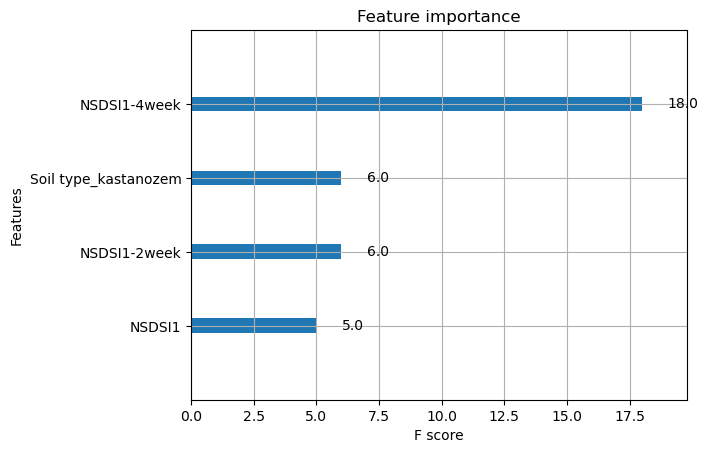

In [132]:
xgb.plot_importance(bst)

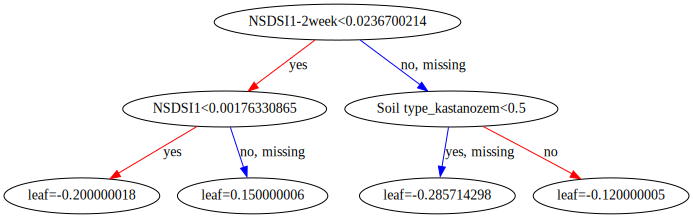

In [133]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
xgb.to_graphviz(bst, num_trees=2)

### Training algorithm with cross-validation

In [134]:
from sklearn.model_selection import cross_val_score
# Load the breast cancer dataset
X, y = train_features, train_labels

# Create an XGBoost model
xgb_model = xgb.XGBClassifier()

# Perform cross-validation and calculate the mean accuracy
scores = cross_val_score(xgb_model, X, y, cv=10)
mean_accuracy = scores.mean()

print("Mean cross-validation accuracy:", mean_accuracy)

C:\Users\rober\anaconda3\envs\ssml\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Mean cross-validation accuracy: 0.9428571428571428


In [135]:
xgb_model.fit(test_features, test_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Prediction and statistics with cross-validation

In [136]:
ypred = xgb_model.predict(test_features, iteration_range=(0, bst.best_iteration + 1))

In [137]:
print("Accuracy =", sklearn.metrics.accuracy_score(test_labels, ypred))
print("Precision = ", sklearn.metrics.precision_score(test_labels, ypred))
print("Recall = ", sklearn.metrics.recall_score(test_labels, ypred))
print("F1Score = ", sklearn.metrics.f1_score(test_labels, ypred))

Accuracy = 0.9166666666666666
Precision =  0.0
Recall =  0.0
F1Score =  0.0


C:\Users\rober\anaconda3\envs\ssml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Feature importance and tree plots without cross-validation

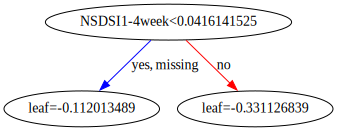

In [138]:
xgb.to_graphviz(xgb_model, num_trees=2)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

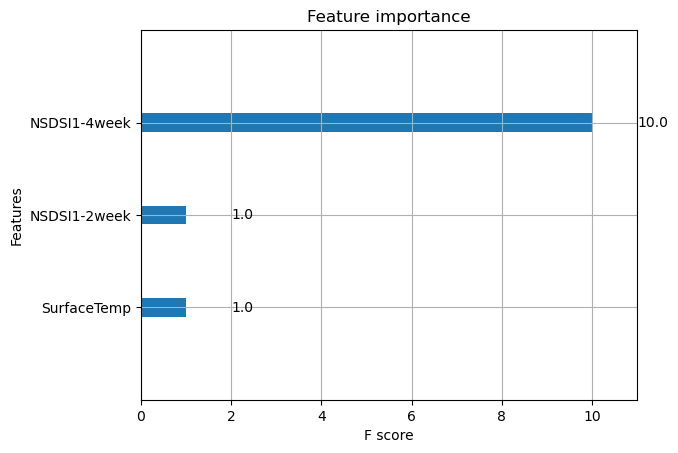

In [139]:
xgb.plot_importance(xgb_model)